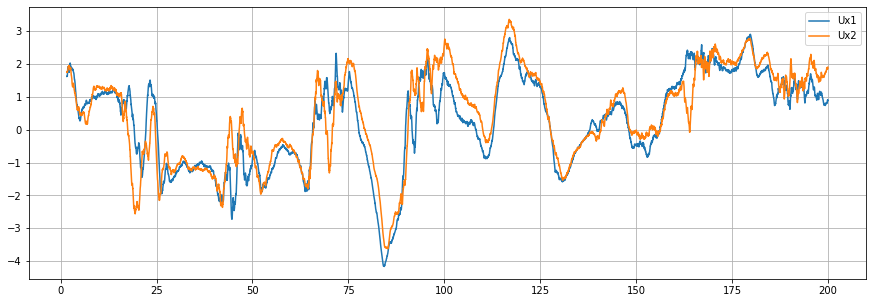

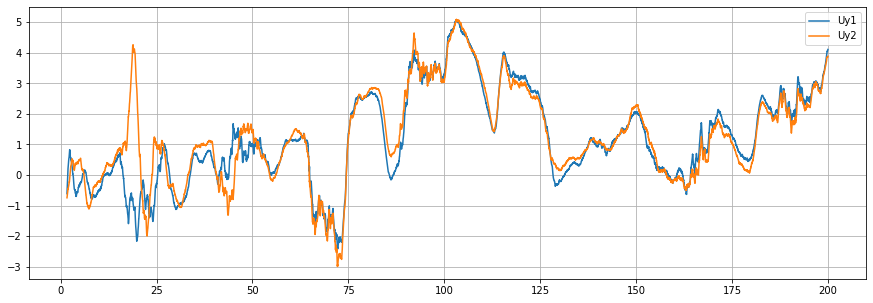

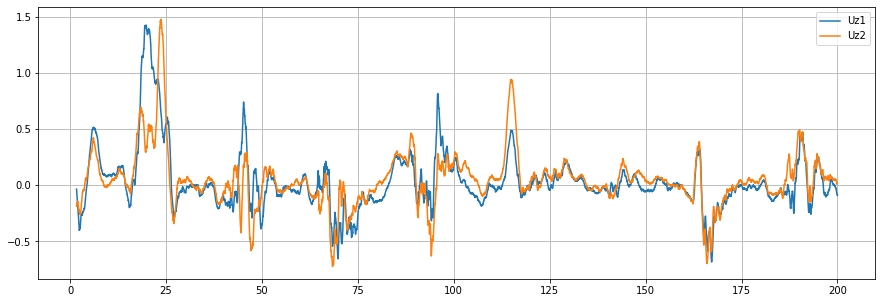

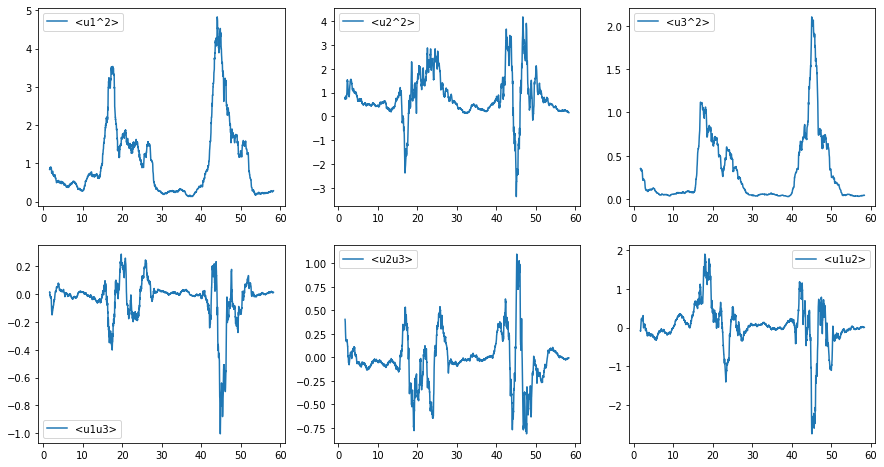

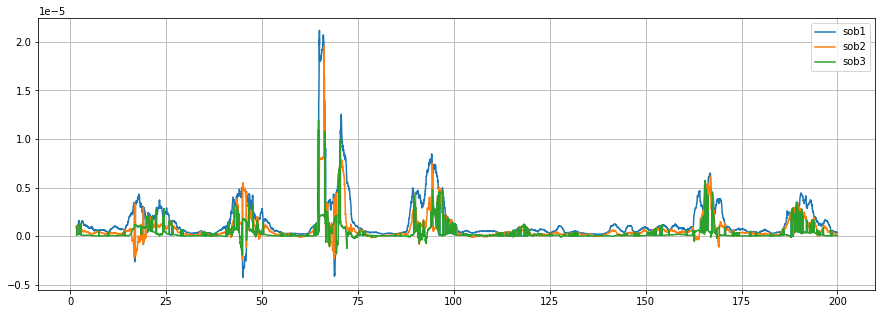

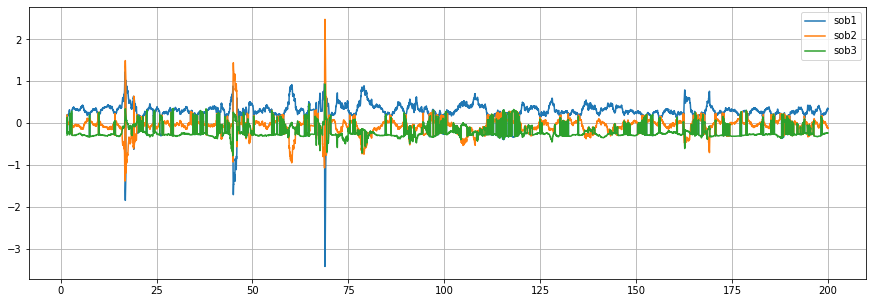

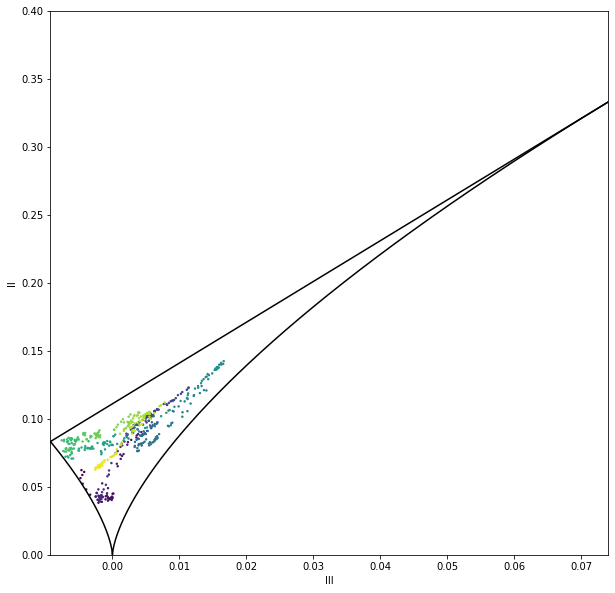

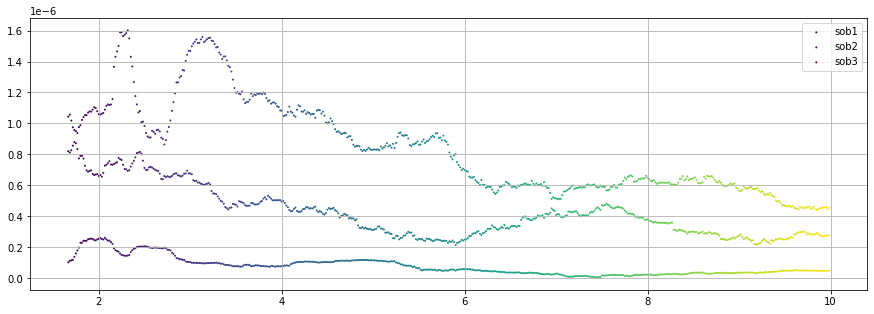

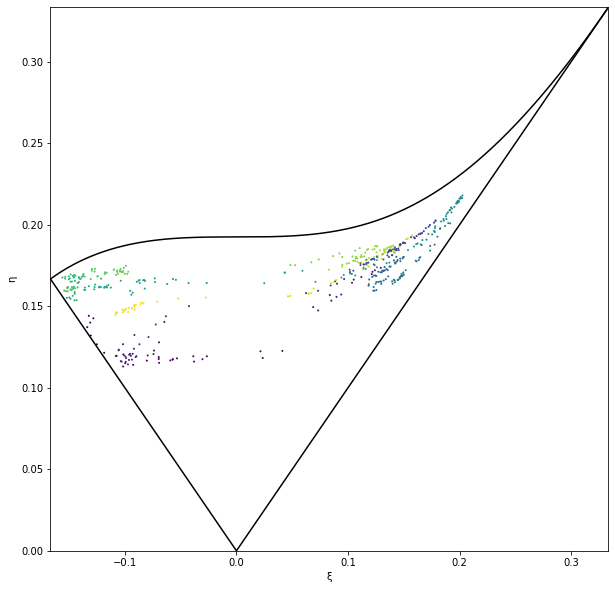

In [2]:
import numpy as n
import matplotlib.pyplot as p
    
    
b1 = n.genfromtxt('./ADCP/I/b1newDec.csv', delimiter=',')
b2 = n.genfromtxt('./ADCP/I/b2newDec.csv', delimiter=',')
b3 = n.genfromtxt('./ADCP/I/b3newDec.csv', delimiter=',')
b4 = n.genfromtxt('./ADCP/II/b4newDec.csv', delimiter=',')
b5 = n.genfromtxt('./ADCP/II/b5newDec.csv', delimiter=',')
b6 = n.genfromtxt('./ADCP/II/b6newDec.csv', delimiter=',')

#2-3, 6-5
b1p = n.zeros(15555)
b2p = n.zeros(15555)
b3p = n.zeros(15555)
b4p = n.zeros(15555)
b5p = n.zeros(15555)
b6p = n.zeros(15555)
b1sr = n.zeros(15555)
b2sr = n.zeros(15555)
b3sr = n.zeros(15555)
b4sr = n.zeros(15555)
b5sr = n.zeros(15555)
b6sr = n.zeros(15555)
Ux1 = n.zeros(15555)
Uy1 = n.zeros(15555)
Uz1 = n.zeros(15555)
Ux2 = n.zeros(15555)
Uy2 = n.zeros(15555)
Uz2 = n.zeros(15555)

for i in range(50,15505):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + b1[i-50+j, 1]
        summ2=summ2 + b2[i-50+j, 1]
        summ3=summ3 + b3[i-50+j, 1]
        summ4=summ4 + b4[i-50+j, 1]
        summ5=summ5 + b5[i-50+j, 1]
        summ6=summ6 + b6[i-50+j, 1]
    b1sr[i]=summ1/100
    b2sr[i]=summ2/100
    b3sr[i]=summ3/100
    b4sr[i]=summ4/100
    b5sr[i]=summ5/100
    b6sr[i]=summ6/100

    

sin = 0.42261826174
ctg = 2.144506921
M1 = sin * n.array([  [1,     0,              ctg],
                      [-1/2,  (3**(1/2))/2,   ctg],
                      [-1/2,  -(3**(1/2))/2,  ctg]])
M1_ = n.linalg.inv(M1)
M2 = sin * n.array([  [-1,    0,              ctg],
                      [1/2,   -(3**(1/2))/2,  ctg],
                      [1/2,   (3**(1/2))/2,   ctg]])
M2_ = n.linalg.inv(M2)

for i in range(100, 12000):
    Ux1[i] =M1_[0,0]*b1sr[i] + M1_[0,1]*b2sr[i] + M1_[0,2]*b3sr[i]
    Ux2[i] =M2_[0,0]*b4sr[i] + M2_[0,1]*b5sr[i] + M2_[0,2]*b6sr[i]
    Uy1[i] =M1_[1,0]*b1sr[i] + M1_[1,1]*b2sr[i] + M1_[1,2]*b3sr[i]
    Uy2[i] =M2_[1,0]*b4sr[i] + M2_[1,1]*b5sr[i] + M2_[1,2]*b6sr[i]
    Uz1[i] =M1_[2,0]*b1sr[i] + M1_[2,1]*b2sr[i] + M1_[2,2]*b3sr[i]
    Uz2[i] =M2_[2,0]*b4sr[i] + M2_[2,1]*b5sr[i] + M2_[2,2]*b6sr[i]


mUx1 = n.zeros(3600)
mUx2 = n.zeros(3600)
mUy1 = n.zeros(3600)
mUy2 = n.zeros(3600)
for i in range(50,3600):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + Ux1[i-50+j, 1]
        summ2=summ2 + Ux2[i-50+j, 1]
        summ3=summ3 + Uy1[i-50+j, 1]
        summ4=summ4 + Uy2[i-50+j, 1]
    mUx1[i]=summ1/100
    mUy1[i]=summ2/100
    mUx2[i]=summ3/100
    mUy2[i]=summ4/100 

    
    
    
x1 = [i/60 for i in range(100, 12000)]
y1 = [Ux1[i]*1000 for i in range(100, 12000)]
y2 = [Ux2[i]*1000 for i in range(100, 12000)]
p.figure(figsize=(15, 5))
p.plot(x1, y1,x1,y2)
p.grid(True)
p.legend(['Ux1','Ux2'])
p.show()

x1 = [i/60 for i in range(100, 12000)]
y1 = [Uy1[i]*1000 for i in range(100, 12000)]
y2 = [Uy2[i]*1000 for i in range(100, 12000)]
p.figure(figsize=(15, 5))
p.plot(x1, y1, x1, y2)
p.grid(True)
p.legend(['Uy1','Uy2'])
p.show()

x1 = [i/60 for i in range(100, 12000)]
y1 = [Uz1[i]*1000 for i in range(100, 12000)]
y2 = [Uz2[i]*1000 for i in range(100, 12000)]
p.figure(figsize=(15, 5))
p.plot(x1, y1, x1, y2)
p.legend(['Uz1','Uz2'])
p.grid(True)
p.show()


############


for i in range(15555):
    b1p[i] = b1sr[i] - b1[i, 1]
    b2p[i] = b2sr[i] - b2[i, 1]
    b3p[i] = b3sr[i] - b3[i, 1]
    b4p[i] = b4sr[i] - b4[i, 1]
    b5p[i] = b5sr[i] - b5[i, 1]
    b6p[i] = b6sr[i] - b6[i, 1]   


M = sin * sin * n.array([  [  1,   0,         2*ctg,   0,  0,            ctg**2  ],
                           [  1,   0,         -2*ctg,  0,  0,            ctg**2  ],
                           [  -1,  0,         0,       0,  0,            ctg**2  ],
                           [  0,   3**(1/2),  0,       0,  -2*3**(1/2),  0       ],
                           [  1/4, 3**(1/2),  0,       0,  2*3**(1/2),   0       ],
                           [  1,   0,         0,       3,  0,            4*ctg**2]])
M_ = n.linalg.inv(M)
B = n.zeros((15555,6))
R = n.zeros((15555,6))
for i in range(15555):
    B[i, 0] = b1p[i]**2
    B[i, 1] = b4p[i]**2
    B[i, 2] = b1p[i]*b4p[i]
    B[i, 3] = b2p[i]**2 - b3p[i]**2
    B[i, 4] = b5p[i]**2 - b6p[i]**2
    B[i, 5] = b2p[i]**2 + b3p[i]**2 + b5p[i]**2 + b6p[i]**2
#for i in range(3901, 15555):
#    B[i, 0] = b1p[i]**2 + b4p[i]**2
#    B[i, 1] = b1p[i]**2 - b4p[i]**2
#    B[i, 2] = b2p[i]*b6p[i] +b3p[i]*b5p[i]
#    B[i, 3] = b2p[i]**2 + b6p[i]**2 -b3p[i]**2 +b5p[i]**2
#    B[i, 4] = b3p[i]**2 + b6p[i]**2 -b2p[i]**2 -b5p[i]**2
#    B[i, 5] = b3p[i]**2 + b6p[i]**2 + b2p[i]**2 + b5p[i]**2
    
for i in range(15555):
    R[i,0] = M_[0,0]*B[i,0] + M_[0,1]*B[i,1] + M_[0,2]*B[i,2] + M_[0,3]*B[i,3] + M_[0,4]*B[i,4] + M_[0,5]*B[i,5]
    R[i,1] = M_[1,0]*B[i,0] + M_[1,1]*B[i,1] + M_[1,2]*B[i,2] + M_[1,3]*B[i,3] + M_[1,4]*B[i,4] + M_[1,5]*B[i,5]
    R[i,2] = M_[2,0]*B[i,0] + M_[2,1]*B[i,1] + M_[2,2]*B[i,2] + M_[2,3]*B[i,3] + M_[2,4]*B[i,4] + M_[2,5]*B[i,5]
    R[i,3] = M_[3,0]*B[i,0] + M_[3,1]*B[i,1] + M_[3,2]*B[i,2] + M_[3,3]*B[i,3] + M_[3,4]*B[i,4] + M_[3,5]*B[i,5]
    R[i,4] = M_[4,0]*B[i,0] + M_[4,1]*B[i,1] + M_[4,2]*B[i,2] + M_[4,3]*B[i,3] + M_[4,4]*B[i,4] + M_[4,5]*B[i,5]
    R[i,5] = M_[5,0]*B[i,0] + M_[5,1]*B[i,1] + M_[5,2]*B[i,2] + M_[5,3]*B[i,3] + M_[5,4]*B[i,4] + M_[5,5]*B[i,5]

R1sr = n.zeros(15555)
R2sr = n.zeros(15555)
R3sr = n.zeros(15555)
R4sr = n.zeros(15555)
R5sr = n.zeros(15555)
R6sr = n.zeros(15555)
for i in range(50,15505):
    summ1=0
    for j in range(100):
        summ1=summ1 + R[i-50+j, 0]
    R1sr[i]=summ1/100

    
    
    
for i in range(50,15505):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + R[i-50+j, 0]
        summ2=summ2 + R[i-50+j, 1]
        summ3=summ3 + R[i-50+j, 2]
        summ4=summ4 + R[i-50+j, 3]
        summ5=summ5 + R[i-50+j, 4]
        summ6=summ6 + R[i-50+j, 5]
    R1sr[i]=summ1/100
    R2sr[i]=summ2/100
    R3sr[i]=summ3/100
    R4sr[i]=summ4/100
    R5sr[i]=summ5/100
    R6sr[i]=summ6/100
    
U11 = n.zeros(15555)
U12 = n.zeros(15555)
U13 = n.zeros(15555)
U21 = n.zeros(15555)
U22 = n.zeros(15555)
U23 = n.zeros(15555)
U31 = n.zeros(15555)
U32 = n.zeros(15555)
U33 = n.zeros(15555)

for i in range(15555):   
    U11[i] = R1sr[i]
    U12[i] = R2sr[i]
    U13[i] = R3sr[i]
    U21[i] = R2sr[i]
    U22[i] = R4sr[i]
    U23[i] = R5sr[i]
    U31[i] = R3sr[i]
    U32[i] = R5sr[i]
    U33[i] = R6sr[i]

Rr = n.zeros((15555,3,3))
for k in range(15555):
    Rr[k, 0,0] = U11[k]
    Rr[k, 0,1] = U12[k]
    Rr[k, 0,2] = U13[k]
    Rr[k, 1,0] = U21[k]
    Rr[k, 1,1] = U22[k]
    Rr[k, 1,2] = U23[k]
    Rr[k, 2,0] = U31[k]
    Rr[k, 2,1] = U32[k]
    Rr[k, 2,2] = U33[k]
    
Rsob, Rvec = n.linalg.eig(Rr)

#################

p.figure(figsize=(15, 8))
x2 = [i/60 for i in range(100, 3500)]
y2 = [R1sr[i]*1000000 for i in range(100, 3500)]
p.subplot(231)
p.plot(x2, y2)
p.legend(['<u1^2>'])

x2 = [i/60 for i in range(100, 3500)]
y2 = [R4sr[i]*1000000 for i in range(100, 3500)]
p.subplot(232)
p.plot(x2, y2)
p.legend(['<u2^2>'])

x2 = [i/60 for i in range(100, 3500)]
y2 = [R6sr[i]*1000000 for i in range(100, 3500)]
p.subplot(233)
p.plot(x2, y2)
p.legend(['<u3^2>'])

x2 = [i/60 for i in range(100, 3500)]
y2 = [R3sr[i]*1000000 for i in range(100, 3500)]
p.subplot(234)
p.plot(x2, y2)
p.legend(['<u1u3>'])

x2 = [i/60 for i in range(100, 3500)]
y2 = [R5sr[i]*1000000 for i in range(100, 3500)]
p.subplot(235)
p.plot(x2, y2)
p.legend(['<u2u3>'])

x2 = [i/60 for i in range(100, 3500)]
y2 = [R2sr[i]*1000000 for i in range(100, 3500)]
p.subplot(236)
p.plot(x2, y2)
p.legend(['<u1u2>'])
p.show()


x1 = [i/60 for i in range(100, 12000)]
y1 = [Rsob[i, 0] for i in range(100, 12000)]
y2 = [Rsob[i, 1] for i in range(100, 12000)]
y3 = [Rsob[i, 2] for i in range(100, 12000)]
p.figure(figsize=(15, 5))
p.plot(x1, y1,x1, y2,x1, y3)
p.grid(True)
p.legend(['sob1','sob2','sob3'])
p.show()




a = n.zeros((15555, 3, 3))
for i in range(100, 12000):
    a[i, 0, 0] = U11[i]/(U11[i]+U22[i]+U33[i]) - 1/3
    a[i, 0, 1] = U12[i]/(U11[i]+U22[i]+U33[i])
    a[i, 0, 2] = U13[i]/(U11[i]+U22[i]+U33[i])
    a[i, 1, 0] = U21[i]/(U11[i]+U22[i]+U33[i])
    a[i, 1, 1] = U22[i]/(U11[i]+U22[i]+U33[i]) - 1/3
    a[i, 1, 2] = U23[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 0] = U31[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 1] = U32[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 2] = U33[i]/(U11[i]+U22[i]+U33[i]) - 1/3
Asob, Avec = n.linalg.eig(a)



x1 = [i/60 for i in range(100, 12000)]
y1 = [Asob[i, 0] for i in range(100, 12000)]
y2 = [Asob[i, 1] for i in range(100, 12000)]
y3 = [Asob[i, 2] for i in range(100, 12000)]
p.figure(figsize=(15, 5))
p.plot(x1, y1,x1, y2,x1, y3)
p.grid(True)
p.legend(['sob1','sob2','sob3'])
p.show()


IIaa = n.zeros(15555)
IIIaa = n.zeros(15555)
A1 = n.zeros(15555)
A2 = n.zeros(15555)
A3 = n.zeros(15555)
for i in range(100,12000):
    A1[i]=a[i, 0, 0]
    A2[i]=a[i, 1, 1]
    A3[i]=a[i, 2, 2]
    IIaa[i] = ((Asob[i, 0]**2) +(Asob[i, 0])*(Asob[i, 1])+((Asob[i, 1])**2))
    IIIaa[i] = -((Asob[i, 0])*(Asob[i, 1])*((Asob[i, 0])+(Asob[i, 1])))

    
    
    
####################
t = 60*4

####################
III = n.linspace(-1/108, 2/27, 1000)
IIa = 1/9 + 3*III
IIb = 3*(1/4 * III**2)**(1/3)
x1 = III
y1 = IIa
y2 = IIb
x3 = [IIIaa[i] for i in range(100, t)]
y3 = [IIaa[i] for i in range(100, t)]
p.figure(figsize=(10, 10))
p.plot(x1, y1, x1, y2, color = 'black')
p.scatter(x3,y3, s=2, c=[i for i in range(100, t)])
p.xlabel('III')
p.ylabel('II')
p.xlim([-1/108, 2/27])
p.ylim([0,0.4])
p.show()




x = [1,2,3]
y = [5,6,7]
x1 = [x for i in range(100, t)]
y1 = [y for i in range(100, t)]
y2 = [Rsob[i, 1] for i in range(100, t)]
y3 = [Rsob[i, 2] for i in range(100, t)]
p.figure(figsize=(15, 5))
p.scatter(x1, y1, s=1, c=[i for i in range(100, t)])
p.scatter(x1, y2, s=1, c=[i for i in range(100, t)])
p.scatter(x1, y3, s=1, c=[i for i in range(100, t)])
p.legend(['sob1','sob2','sob3'])
p.grid(True)
p.show()



η = n.linspace(-1/6, 1/3, 1000)
ξ1 = abs(η)
ξ2 = ((1/27) + 2*η**3)**(1/2)
x1 = η
y1 = ξ1
y2 = ξ2
x3 = [n.sign(IIIaa[i]) * (n.abs(IIIaa[i])/2) ** (1 / 3) for i in range(100, t)]
y3 = [(IIaa[i]/3)**(1/2) for i in range(100, t)]
p.figure(figsize=(10, 10))
p.plot(x1, y1, x1, y2, color = 'black')
p.scatter(x3,y3, s=1, c=[i for i in range(100, t)])
p.xlabel('ξ')
p.ylabel('η')
p.xlim([-1/6, 1/3])
p.ylim([0, 1/3])
p.show()

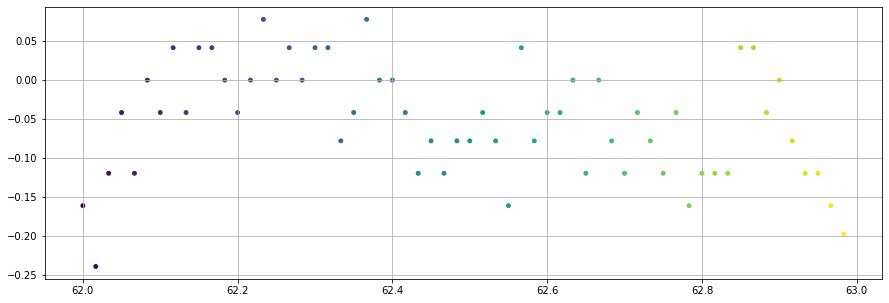

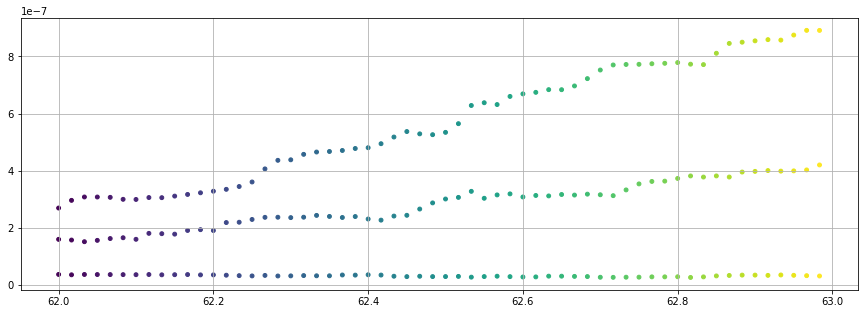

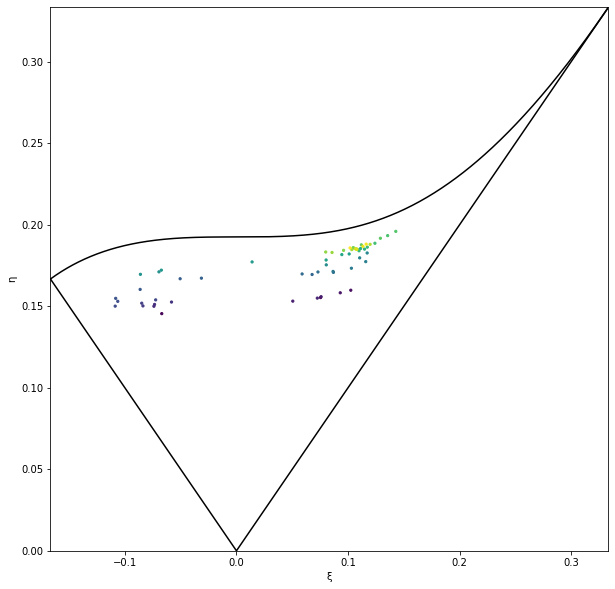

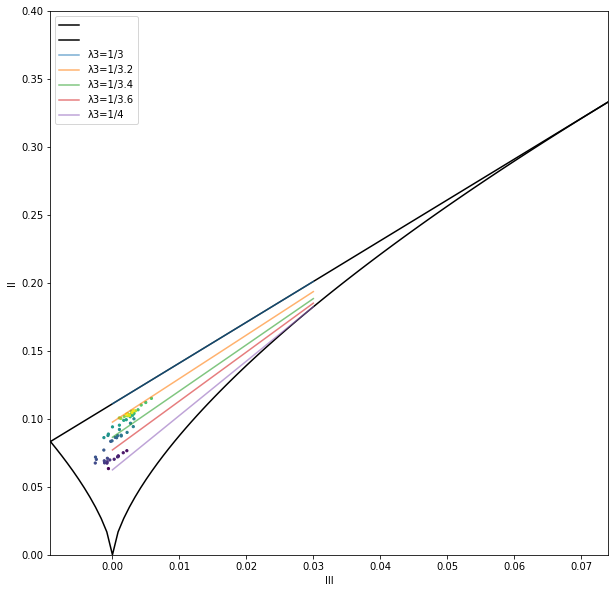

In [103]:
import numpy as n
import matplotlib.pyplot as p
    
    
b1 = n.genfromtxt('./ADCP/I/b1newDec.csv', delimiter=',')
b3 = n.genfromtxt('./ADCP/I/b2newDec.csv', delimiter=',')
b2 = n.genfromtxt('./ADCP/I/b3newDec.csv', delimiter=',')
b4 = n.genfromtxt('./ADCP/II/b4newDec.csv', delimiter=',')
b6 = n.genfromtxt('./ADCP/II/b5newDec.csv', delimiter=',')
b5 = n.genfromtxt('./ADCP/II/b6newDec.csv', delimiter=',')
rad = n.genfromtxt('./ADCP/rad.csv', delimiter=',')

#2-3, 6-5
b1p = n.zeros(15555)
b2p = n.zeros(15555)
b3p = n.zeros(15555)
b4p = n.zeros(15555)
b5p = n.zeros(15555)
b6p = n.zeros(15555)
b1sr = n.zeros(15555)
b2sr = n.zeros(15555)
b3sr = n.zeros(15555)
b4sr = n.zeros(15555)
b5sr = n.zeros(15555)
b6sr = n.zeros(15555)
Ux1 = n.zeros(15555)
Uy1 = n.zeros(15555)
Uz1 = n.zeros(15555)
Ux2 = n.zeros(15555)
Uy2 = n.zeros(15555)
Uz2 = n.zeros(15555)

for i in range(50,15505):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + b1[i-50+j, 1]
        summ2=summ2 + b2[i-50+j, 1]
        summ3=summ3 + b3[i-50+j, 1]
        summ4=summ4 + b4[i-50+j, 1]
        summ5=summ5 + b5[i-50+j, 1]
        summ6=summ6 + b6[i-50+j, 1]
    b1sr[i]=summ1/100
    b2sr[i]=summ2/100
    b3sr[i]=summ3/100
    b4sr[i]=summ4/100
    b5sr[i]=summ5/100
    b6sr[i]=summ6/100

    

sin = 0.42261826174
ctg = 2.144506921
M1 = sin * n.array([  [1,     0,              ctg],
                      [-1/2,  (3**(1/2))/2,   ctg],
                      [-1/2,  -(3**(1/2))/2,  ctg]])
M1_ = n.linalg.inv(M1)
M2 = sin * n.array([  [-1,    0,              ctg],
                      [1/2,   -(3**(1/2))/2,  ctg],
                      [1/2,   (3**(1/2))/2,   ctg]])
M2_ = n.linalg.inv(M2)

for i in range(100, 12000):
    Ux1[i] =M1_[0,0]*b1sr[i] + M1_[0,1]*b2sr[i] + M1_[0,2]*b3sr[i]
    Ux2[i] =M2_[0,0]*b4sr[i] + M2_[0,1]*b5sr[i] + M2_[0,2]*b6sr[i]
    Uy1[i] =M1_[1,0]*b1sr[i] + M1_[1,1]*b2sr[i] + M1_[1,2]*b3sr[i]
    Uy2[i] =M2_[1,0]*b4sr[i] + M2_[1,1]*b5sr[i] + M2_[1,2]*b6sr[i]
    Uz1[i] =M1_[2,0]*b1sr[i] + M1_[2,1]*b2sr[i] + M1_[2,2]*b3sr[i]
    Uz2[i] =M2_[2,0]*b4sr[i] + M2_[2,1]*b5sr[i] + M2_[2,2]*b6sr[i]



for i in range(15555):
    b1p[i] = b1sr[i] - b1[i, 1]
    b2p[i] = b2sr[i] - b2[i, 1]
    b3p[i] = b3sr[i] - b3[i, 1]
    b4p[i] = b4sr[i] - b4[i, 1]
    b5p[i] = b5sr[i] - b5[i, 1]
    b6p[i] = b6sr[i] - b6[i, 1]   


M = sin * sin * n.array([  [  1,   0,         2*ctg,   0,  0,            ctg**2  ],
                           [  1,   0,         -2*ctg,  0,  0,            ctg**2  ],
                           [  -1,  0,         0,       0,  0,            ctg**2  ],
                           [  0,   3**(1/2),  0,       0,  -2*3**(1/2),  0       ],
                           [  1/4, 3**(1/2),  0,       0,  2*3**(1/2),   0       ],
                           [  1,   0,         0,       3,  0,            4*ctg**2]])
M_ = n.linalg.inv(M)
B = n.zeros((15555,6))
R = n.zeros((15555,6))
for i in range(15555):
    B[i, 0] = b1p[i]**2
    B[i, 1] = b4p[i]**2
    B[i, 2] = b1p[i]*b4p[i]
    B[i, 3] = b2p[i]**2 - b3p[i]**2
    B[i, 4] = b5p[i]**2 - b6p[i]**2
    B[i, 5] = b2p[i]**2 + b3p[i]**2 + b5p[i]**2 + b6p[i]**2

for i in range(15555):
    R[i,0] = M_[0,0]*B[i,0] + M_[0,1]*B[i,1] + M_[0,2]*B[i,2] + M_[0,3]*B[i,3] + M_[0,4]*B[i,4] + M_[0,5]*B[i,5]
    R[i,1] = M_[1,0]*B[i,0] + M_[1,1]*B[i,1] + M_[1,2]*B[i,2] + M_[1,3]*B[i,3] + M_[1,4]*B[i,4] + M_[1,5]*B[i,5]
    R[i,2] = M_[2,0]*B[i,0] + M_[2,1]*B[i,1] + M_[2,2]*B[i,2] + M_[2,3]*B[i,3] + M_[2,4]*B[i,4] + M_[2,5]*B[i,5]
    R[i,3] = M_[3,0]*B[i,0] + M_[3,1]*B[i,1] + M_[3,2]*B[i,2] + M_[3,3]*B[i,3] + M_[3,4]*B[i,4] + M_[3,5]*B[i,5]
    R[i,4] = M_[4,0]*B[i,0] + M_[4,1]*B[i,1] + M_[4,2]*B[i,2] + M_[4,3]*B[i,3] + M_[4,4]*B[i,4] + M_[4,5]*B[i,5]
    R[i,5] = M_[5,0]*B[i,0] + M_[5,1]*B[i,1] + M_[5,2]*B[i,2] + M_[5,3]*B[i,3] + M_[5,4]*B[i,4] + M_[5,5]*B[i,5]

R1sr = n.zeros(15555)
R2sr = n.zeros(15555)
R3sr = n.zeros(15555)
R4sr = n.zeros(15555)
R5sr = n.zeros(15555)
R6sr = n.zeros(15555)
for i in range(50,15505):
    summ1=0
    for j in range(100):
        summ1=summ1 + R[i-50+j, 0]
    R1sr[i]=summ1/100

    
    
    
for i in range(50,15505):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + R[i-50+j, 0]
        summ2=summ2 + R[i-50+j, 1]
        summ3=summ3 + R[i-50+j, 2]
        summ4=summ4 + R[i-50+j, 3]
        summ5=summ5 + R[i-50+j, 4]
        summ6=summ6 + R[i-50+j, 5]
    R1sr[i]=summ1/100
    R2sr[i]=summ2/100
    R3sr[i]=summ3/100
    R4sr[i]=summ4/100
    R5sr[i]=summ5/100
    R6sr[i]=summ6/100
    
U11 = n.zeros(15555)
U12 = n.zeros(15555)
U13 = n.zeros(15555)
U21 = n.zeros(15555)
U22 = n.zeros(15555)
U23 = n.zeros(15555)
U31 = n.zeros(15555)
U32 = n.zeros(15555)
U33 = n.zeros(15555)

for i in range(15555):   
    U11[i] = R1sr[i]
    U12[i] = R2sr[i]
    U13[i] = R3sr[i]
    U21[i] = R2sr[i]
    U22[i] = R4sr[i]
    U23[i] = R5sr[i]
    U31[i] = R3sr[i]
    U32[i] = R5sr[i]
    U33[i] = R6sr[i]

Rr = n.zeros((15555,3,3))
for k in range(15555):
    Rr[k, 0,0] = U11[k]
    Rr[k, 0,1] = U12[k]
    Rr[k, 0,2] = U13[k]
    Rr[k, 1,0] = U21[k]
    Rr[k, 1,1] = U22[k]
    Rr[k, 1,2] = U23[k]
    Rr[k, 2,0] = U31[k]
    Rr[k, 2,1] = U32[k]
    Rr[k, 2,2] = U33[k]
    
Rsob, Rvec = n.linalg.eig(Rr)

#################


a = n.zeros((15555, 3, 3))
for i in range(100, 12000):
    a[i, 0, 0] = U11[i]/(U11[i]+U22[i]+U33[i]) - 1/3
    a[i, 0, 1] = U12[i]/(U11[i]+U22[i]+U33[i])
    a[i, 0, 2] = U13[i]/(U11[i]+U22[i]+U33[i])
    a[i, 1, 0] = U21[i]/(U11[i]+U22[i]+U33[i])
    a[i, 1, 1] = U22[i]/(U11[i]+U22[i]+U33[i]) - 1/3
    a[i, 1, 2] = U23[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 0] = U31[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 1] = U32[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 2] = U33[i]/(U11[i]+U22[i]+U33[i]) - 1/3
Asob, Avec = n.linalg.eig(a)




IIaa = n.zeros(15555)
IIIaa = n.zeros(15555)
A1 = n.zeros(15555)
A2 = n.zeros(15555)
A3 = n.zeros(15555)
for i in range(100,12000):
    A1[i]=a[i, 0, 0]
    A2[i]=a[i, 1, 1]
    A3[i]=a[i, 2, 2]
    IIaa[i] = ((Asob[i, 0]**2) +(Asob[i, 0])*(Asob[i, 1])+((Asob[i, 1])**2))
    IIIaa[i] = -((Asob[i, 0])*(Asob[i, 1])*((Asob[i, 0])+(Asob[i, 1])))

    
    
    



    
####################
t1= 60*62
t2 = 60*63
####################


x1 = [i/60 for i in range(t1, t2)]
y1 = [rad[i,1] for i in range(t1, t2)]
p.figure(figsize=(15, 5))
p.scatter(x1, y1, s=15, c=[i for i in range(t1, t2)])
p.grid(True)
p.show()

x1 = [i/60 for i in range(t1, t2)]
y1 = [Rsob[i, 0] for i in range(t1, t2)]
y2 = [Rsob[i, 1] for i in range(t1, t2)]
y3 = [Rsob[i, 2] for i in range(t1, t2)]
p.figure(figsize=(15, 5))
p.scatter(x1, y1, s=15, c=[i for i in range(t1, t2)])
p.scatter(x1, y2, s=15, c=[i for i in range(t1, t2)])
p.scatter(x1, y3, s=15, c=[i for i in range(t1, t2)])
p.grid(True)
p.show()


η = n.linspace(-1/6, 1/3, 1000)
ξ1 = abs(η)
ξ2 = ((1/27) + 2*η**3)**(1/2)
x1 = η
y1 = ξ1
y2 = ξ2
x3 = [n.sign(IIIaa[i]) * (n.abs(IIIaa[i])/2) ** (1 / 3) for i in range(t1, t2)]
y3 = [(IIaa[i]/3)**(1/2) for i in range(t1, t2)]
p.figure(figsize=(10, 10))
p.plot(x1, y1, x1, y2, color = 'black')
p.scatter(x3,y3, s=5, c=[i for i in range(t1, t2)])
p.xlabel('ξ')
p.ylabel('η')
p.xlim([-1/6, 1/3])
p.ylim([0, 1/3])
p.show()


III = n.linspace(-1/108, 2/27, 100)
III1 = n.linspace(0, 0.03, 100)
II1 = ((-1/3)**2)-(III1/(-1/3))
II2 = ((-1/3.2)**2)-(III1/(-1/3.2))
II3 = ((-1/3.4)**2)-(III1/(-1/3.4))
II4 = ((-1/3.6)**2)-(III1/(-1/3.6))
II5 = ((-1/4)**2)-(III1/(-1/4))
IIa = 1/9 + 3*III
IIb = 3*(1/4 * III**2)**(1/3)
x1 = III
y1 = IIa
y2 = IIb
x3 = [IIIaa[i] for i in range(t1, t2)]
y3 = [IIaa[i] for i in range(t1, t2)]
p.figure(figsize=(10,10))
p.plot(x1, y1, x1, y2, color = 'black')
p.scatter(x3,y3, s=5, c=[i for i in range(t1, t2)])
x1 = III1
y1 = II1
y2 = II2
y3 = II3
y4 = II4
y5 = II5
p.plot(x1, y1,x1, y2,x1, y3,x1, y4,x1, y5, alpha = 0.6)
p.xlabel('III')
p.ylabel('II')
p.xlim([-1/108, 2/27])
p.ylim([0,0.4])
p.legend(['','','λ3=1/3','λ3=1/3.2','λ3=1/3.4','λ3=1/3.6','λ3=1/4'])
p.show()

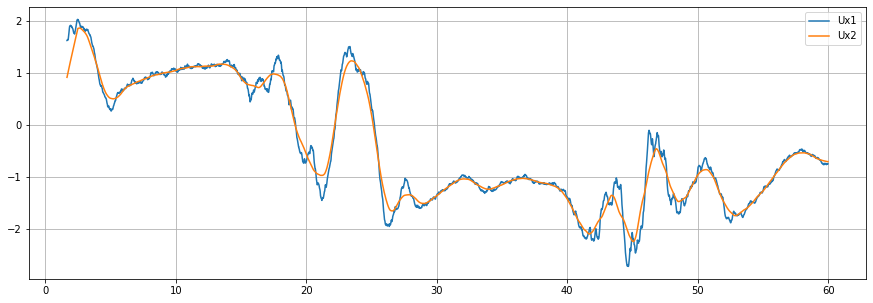

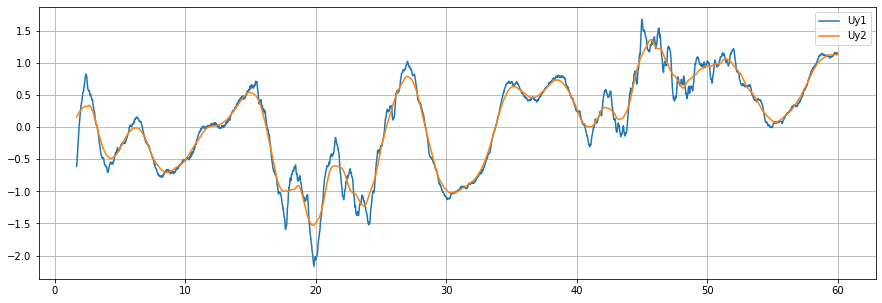

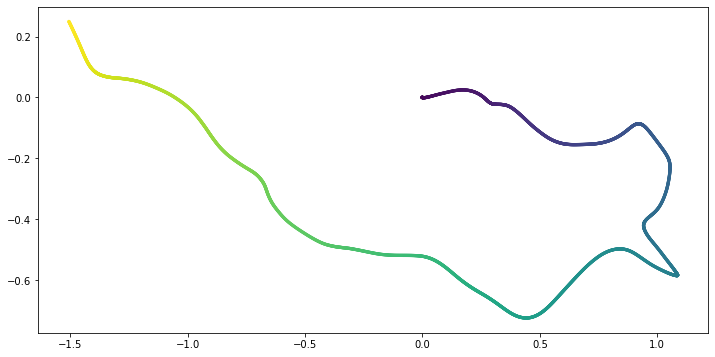

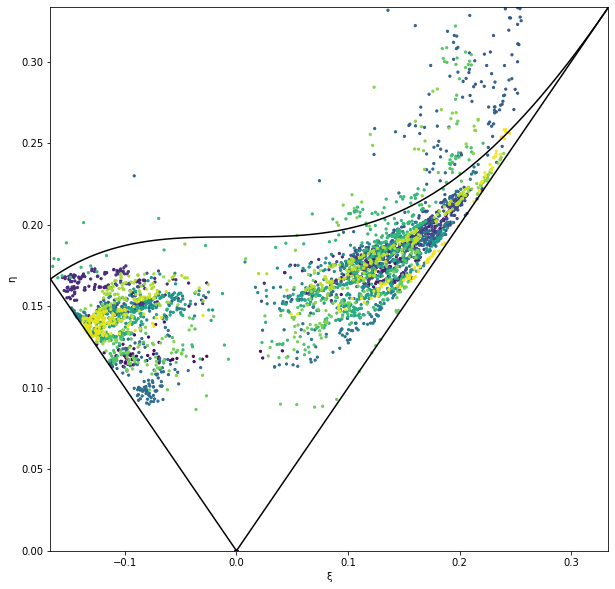

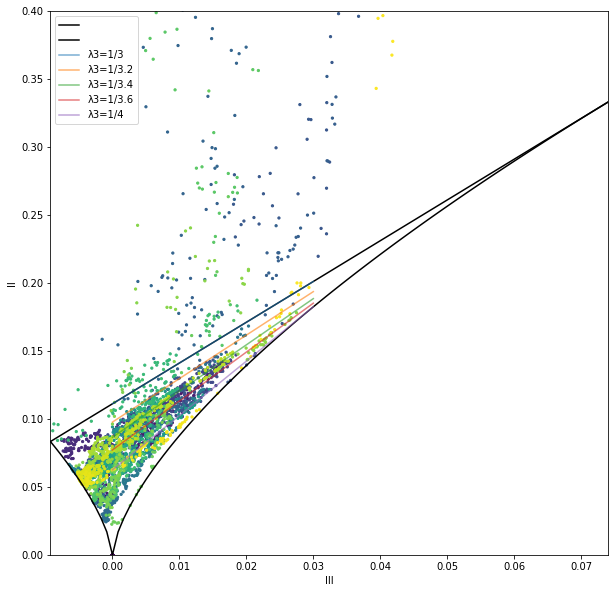

In [12]:
import numpy as n
import matplotlib.pyplot as p
    
    
b1 = n.genfromtxt('./ADCP/I/b1newDec.csv', delimiter=',')
b3 = n.genfromtxt('./ADCP/I/b2newDec.csv', delimiter=',')
b2 = n.genfromtxt('./ADCP/I/b3newDec.csv', delimiter=',')
b4 = n.genfromtxt('./ADCP/II/b4newDec.csv', delimiter=',')
b6 = n.genfromtxt('./ADCP/II/b5newDec.csv', delimiter=',')
b5 = n.genfromtxt('./ADCP/II/b6newDec.csv', delimiter=',')

#2-3, 6-5
b1p = n.zeros(15555)
b2p = n.zeros(15555)
b3p = n.zeros(15555)
b4p = n.zeros(15555)
b5p = n.zeros(15555)
b6p = n.zeros(15555)
b1sr = n.zeros(15555)
b2sr = n.zeros(15555)
b3sr = n.zeros(15555)
b4sr = n.zeros(15555)
b5sr = n.zeros(15555)
b6sr = n.zeros(15555)
Ux1 = n.zeros(15555)
Uy1 = n.zeros(15555)
Uz1 = n.zeros(15555)
Ux2 = n.zeros(15555)
Uy2 = n.zeros(15555)
Uz2 = n.zeros(15555)

for i in range(50,15505):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + b1[i-50+j, 1]
        summ2=summ2 + b2[i-50+j, 1]
        summ3=summ3 + b3[i-50+j, 1]
        summ4=summ4 + b4[i-50+j, 1]
        summ5=summ5 + b5[i-50+j, 1]
        summ6=summ6 + b6[i-50+j, 1]
    b1sr[i]=summ1/100
    b2sr[i]=summ2/100
    b3sr[i]=summ3/100
    b4sr[i]=summ4/100
    b5sr[i]=summ5/100
    b6sr[i]=summ6/100

    

sin = 0.42261826174
ctg = 2.144506921
M1 = sin * n.array([  [1,     0,              ctg],
                      [-1/2,  (3**(1/2))/2,   ctg],
                      [-1/2,  -(3**(1/2))/2,  ctg]])
M1_ = n.linalg.inv(M1)
M2 = sin * n.array([  [-1,    0,              ctg],
                      [1/2,   -(3**(1/2))/2,  ctg],
                      [1/2,   (3**(1/2))/2,   ctg]])
M2_ = n.linalg.inv(M2)

for i in range(100, 12000):
    Ux1[i] =M1_[0,0]*b1sr[i] + M1_[0,1]*b2sr[i] + M1_[0,2]*b3sr[i]
    Ux2[i] =M2_[0,0]*b4sr[i] + M2_[0,1]*b5sr[i] + M2_[0,2]*b6sr[i]
    Uy1[i] =M1_[1,0]*b1sr[i] + M1_[1,1]*b2sr[i] + M1_[1,2]*b3sr[i]
    Uy2[i] =M2_[1,0]*b4sr[i] + M2_[1,1]*b5sr[i] + M2_[1,2]*b6sr[i]
    Uz1[i] =M1_[2,0]*b1sr[i] + M1_[2,1]*b2sr[i] + M1_[2,2]*b3sr[i]
    Uz2[i] =M2_[2,0]*b4sr[i] + M2_[2,1]*b5sr[i] + M2_[2,2]*b6sr[i]


mUx1 = n.zeros(3600)
mUx2 = n.zeros(3600)
mUy1 = n.zeros(3600)
mUy2 = n.zeros(3600)
for i in range(50,3600):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + Ux1[i-50+j]
        summ2=summ2 + Uy1[i-50+j]
        summ3=summ3 + Uy1[i-50+j]
        summ4=summ4 + Uy2[i-50+j]
    mUx1[i]=summ1/100
    mUy1[i]=summ2/100
    mUx2[i]=summ3/100
    mUy2[i]=summ4/100 

    


for i in range(15555):
    b1p[i] = b1sr[i] - b1[i, 1]
    b2p[i] = b2sr[i] - b2[i, 1]
    b3p[i] = b3sr[i] - b3[i, 1]
    b4p[i] = b4sr[i] - b4[i, 1]
    b5p[i] = b5sr[i] - b5[i, 1]
    b6p[i] = b6sr[i] - b6[i, 1]   


M = sin * sin * n.array([  [  1,   0,         2*ctg,   0,  0,            ctg**2  ],
                           [  1,   0,         -2*ctg,  0,  0,            ctg**2  ],
                           [  -1,  0,         0,       0,  0,            ctg**2  ],
                           [  0,   3**(1/2),  0,       0,  -2*3**(1/2),  0       ],
                           [  1/4, 3**(1/2),  0,       0,  2*3**(1/2),   0       ],
                           [  1,   0,         0,       3,  0,            4*ctg**2]])
M_ = n.linalg.inv(M)
B = n.zeros((15555,6))
R = n.zeros((15555,6))
for i in range(15555):
    B[i, 0] = b1p[i]**2
    B[i, 1] = b4p[i]**2
    B[i, 2] = b1p[i]*b4p[i]
    B[i, 3] = b2p[i]**2 - b3p[i]**2
    B[i, 4] = b5p[i]**2 - b6p[i]**2
    B[i, 5] = b2p[i]**2 + b3p[i]**2 + b5p[i]**2 + b6p[i]**2

for i in range(15555):
    R[i,0] = M_[0,0]*B[i,0] + M_[0,1]*B[i,1] + M_[0,2]*B[i,2] + M_[0,3]*B[i,3] + M_[0,4]*B[i,4] + M_[0,5]*B[i,5]
    R[i,1] = M_[1,0]*B[i,0] + M_[1,1]*B[i,1] + M_[1,2]*B[i,2] + M_[1,3]*B[i,3] + M_[1,4]*B[i,4] + M_[1,5]*B[i,5]
    R[i,2] = M_[2,0]*B[i,0] + M_[2,1]*B[i,1] + M_[2,2]*B[i,2] + M_[2,3]*B[i,3] + M_[2,4]*B[i,4] + M_[2,5]*B[i,5]
    R[i,3] = M_[3,0]*B[i,0] + M_[3,1]*B[i,1] + M_[3,2]*B[i,2] + M_[3,3]*B[i,3] + M_[3,4]*B[i,4] + M_[3,5]*B[i,5]
    R[i,4] = M_[4,0]*B[i,0] + M_[4,1]*B[i,1] + M_[4,2]*B[i,2] + M_[4,3]*B[i,3] + M_[4,4]*B[i,4] + M_[4,5]*B[i,5]
    R[i,5] = M_[5,0]*B[i,0] + M_[5,1]*B[i,1] + M_[5,2]*B[i,2] + M_[5,3]*B[i,3] + M_[5,4]*B[i,4] + M_[5,5]*B[i,5]

R1sr = n.zeros(15555)
R2sr = n.zeros(15555)
R3sr = n.zeros(15555)
R4sr = n.zeros(15555)
R5sr = n.zeros(15555)
R6sr = n.zeros(15555)
for i in range(50,15505):
    summ1=0
    for j in range(100):
        summ1=summ1 + R[i-50+j, 0]
    R1sr[i]=summ1/100

    
    
    
for i in range(50,15505):
    summ1=0
    summ2=0
    summ3=0
    summ4=0
    summ5=0
    summ6=0
    for j in range(100):
        summ1=summ1 + R[i-50+j, 0]
        summ2=summ2 + R[i-50+j, 1]
        summ3=summ3 + R[i-50+j, 2]
        summ4=summ4 + R[i-50+j, 3]
        summ5=summ5 + R[i-50+j, 4]
        summ6=summ6 + R[i-50+j, 5]
    R1sr[i]=summ1/100
    R2sr[i]=summ2/100
    R3sr[i]=summ3/100
    R4sr[i]=summ4/100
    R5sr[i]=summ5/100
    R6sr[i]=summ6/100

    
x1 = [i/60 for i in range(100, 3600)]
y1 = [Ux1[i]*1000 for i in range(100, 3600)]
y2 = [mUx1[i]*1000 for i in range(100, 3600)]
p.figure(figsize=(15, 5))
p.plot(x1, y1,x1,y2)
p.grid(True)
p.legend(['Ux1','Ux2'])
p.show()

x1 = [i/60 for i in range(100, 3600)]
y1 = [Uy1[i]*1000 for i in range(100, 3600)]
y2 = [mUy1[i]*1000 for i in range(100, 3600)]
p.figure(figsize=(15, 5))
p.plot(x1, y1, x1, y2)
p.grid(True)
p.legend(['Uy1','Uy2'])
p.show()




U11 = n.zeros(15555)
U12 = n.zeros(15555)
U13 = n.zeros(15555)
U21 = n.zeros(15555)
U22 = n.zeros(15555)
U23 = n.zeros(15555)
U31 = n.zeros(15555)
U32 = n.zeros(15555)
U33 = n.zeros(15555)

for i in range(15555):   
    U11[i] = R1sr[i]
    U12[i] = R2sr[i]
    U13[i] = R3sr[i]
    U21[i] = R2sr[i]
    U22[i] = R4sr[i]
    U23[i] = R5sr[i]
    U31[i] = R3sr[i]
    U32[i] = R5sr[i]
    U33[i] = R6sr[i]

Rr = n.zeros((15555,3,3))
for k in range(15555):
    Rr[k, 0,0] = U11[k]
    Rr[k, 0,1] = U12[k]
    Rr[k, 0,2] = U13[k]
    Rr[k, 1,0] = U21[k]
    Rr[k, 1,1] = U22[k]
    Rr[k, 1,2] = U23[k]
    Rr[k, 2,0] = U31[k]
    Rr[k, 2,1] = U32[k]
    Rr[k, 2,2] = U33[k]
    
Rsob, Rvec = n.linalg.eig(Rr)

#################


a = n.zeros((15555, 3, 3))
for i in range(100, 12000):
    a[i, 0, 0] = U11[i]/(U11[i]+U22[i]+U33[i]) - 1/3
    a[i, 0, 1] = U12[i]/(U11[i]+U22[i]+U33[i])
    a[i, 0, 2] = U13[i]/(U11[i]+U22[i]+U33[i])
    a[i, 1, 0] = U21[i]/(U11[i]+U22[i]+U33[i])
    a[i, 1, 1] = U22[i]/(U11[i]+U22[i]+U33[i]) - 1/3
    a[i, 1, 2] = U23[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 0] = U31[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 1] = U32[i]/(U11[i]+U22[i]+U33[i])
    a[i, 2, 2] = U33[i]/(U11[i]+U22[i]+U33[i]) - 1/3
Asob, Avec = n.linalg.eig(a)




IIaa = n.zeros(15555)
IIIaa = n.zeros(15555)
A1 = n.zeros(15555)
A2 = n.zeros(15555)
A3 = n.zeros(15555)
for i in range(100,12000):
    A1[i]=a[i, 0, 0]
    A2[i]=a[i, 1, 1]
    A3[i]=a[i, 2, 2]
    IIaa[i] = ((Asob[i, 0]**2) +(Asob[i, 0])*(Asob[i, 1])+((Asob[i, 1])**2))
    IIIaa[i] = -((Asob[i, 0])*(Asob[i, 1])*((Asob[i, 0])+(Asob[i, 1])))

    
    
    



    
####################
t1= 60*1
t2 = 60*60
####################


t1=0
t2=3600
rs1=mUx1.cumsum()
rs2=mUy1.cumsum()

p.figure(figsize=(12,6))
p.scatter(rs1,rs2, s=5, c=[i for i in range(t1, t2)])
p.show()



η = n.linspace(-1/6, 1/3, 1000)
ξ1 = abs(η)
ξ2 = ((1/27) + 2*η**3)**(1/2)
x1 = η
y1 = ξ1
y2 = ξ2
x3 = [n.sign(IIIaa[i]) * (n.abs(IIIaa[i])/2) ** (1 / 3) for i in range(t1, t2)]
y3 = [(IIaa[i]/3)**(1/2) for i in range(t1, t2)]
p.figure(figsize=(10, 10))
p.plot(x1, y1, x1, y2, color = 'black')
p.scatter(x3,y3, s=5, c=[i for i in range(t1, t2)])
p.xlabel('ξ')
p.ylabel('η')
p.xlim([-1/6, 1/3])
p.ylim([0, 1/3])
p.show()


III = n.linspace(-1/108, 2/27, 100)
III1 = n.linspace(0, 0.03, 100)
II1 = ((-1/3)**2)-(III1/(-1/3))
II2 = ((-1/3.2)**2)-(III1/(-1/3.2))
II3 = ((-1/3.4)**2)-(III1/(-1/3.4))
II4 = ((-1/3.6)**2)-(III1/(-1/3.6))
II5 = ((-1/4)**2)-(III1/(-1/4))
IIa = 1/9 + 3*III
IIb = 3*(1/4 * III**2)**(1/3)
x1 = III
y1 = IIa
y2 = IIb
x3 = [IIIaa[i] for i in range(t1, t2)]
y3 = [IIaa[i] for i in range(t1, t2)]
p.figure(figsize=(10,10))
p.plot(x1, y1, x1, y2, color = 'black')
p.scatter(x3,y3, s=5, c=[i for i in range(t1, t2)])
x1 = III1
y1 = II1
y2 = II2
y3 = II3
y4 = II4
y5 = II5
p.plot(x1, y1,x1, y2,x1, y3,x1, y4,x1, y5, alpha = 0.6)
p.xlabel('III')
p.ylabel('II')
p.xlim([-1/108, 2/27])
p.ylim([0,0.4])
p.legend(['','','λ3=1/3','λ3=1/3.2','λ3=1/3.4','λ3=1/3.6','λ3=1/4'])
p.show()